## WeatherPy

### Analysis
* There is an observable relationship between latitude and temperature.  The temperature is warmer for latitudes near the equator (0 degree latitude).
* The is no observable relationsihip between latitude and humidity.
* The is no observable relationsihip between latitude and wind speed.
* There is no observable relatioship between latitude and cloudiness.


### Setup

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File (CSV)
output_data_file = "cities.csv"

# Range of Latitudes and Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | tongren
Processing Record 3 of Set 1 | mettur
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | sobolevo
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | dunedin
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | novyy urengoy
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | acapulco
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | liverpool
Processing Record 23 of Set 1

Processing Record 34 of Set 4 | thompson
Processing Record 35 of Set 4 | yushu
Processing Record 36 of Set 4 | kirakira
Processing Record 37 of Set 4 | opuwo
Processing Record 38 of Set 4 | mackay
Processing Record 39 of Set 4 | tiksi
Processing Record 40 of Set 4 | comodoro rivadavia
Processing Record 41 of Set 4 | broome
Processing Record 42 of Set 4 | grants
Processing Record 43 of Set 4 | uaua
Processing Record 44 of Set 4 | dwarka
Processing Record 45 of Set 4 | doctor pedro p. pena
City not found. Skipping...
Processing Record 46 of Set 4 | sao filipe
Processing Record 47 of Set 4 | tecoanapa
Processing Record 48 of Set 4 | purwakarta
Processing Record 49 of Set 4 | bambous virieux
Processing Record 0 of Set 5 | shchelyayur
City not found. Skipping...
Processing Record 1 of Set 5 | cukai
Processing Record 2 of Set 5 | kodiak
Processing Record 3 of Set 5 | ponta do sol
Processing Record 4 of Set 5 | bunia
Processing Record 5 of Set 5 | tabou
Processing Record 6 of Set 5 | caravela

Processing Record 24 of Set 8 | sudak
Processing Record 25 of Set 8 | hihifo
City not found. Skipping...
Processing Record 26 of Set 8 | waitati
Processing Record 27 of Set 8 | hay river
Processing Record 28 of Set 8 | moranbah
Processing Record 29 of Set 8 | togur
Processing Record 30 of Set 8 | sikonge
Processing Record 31 of Set 8 | homer
Processing Record 32 of Set 8 | tigil
Processing Record 33 of Set 8 | ustka
Processing Record 34 of Set 8 | inongo
Processing Record 35 of Set 8 | luanda
Processing Record 36 of Set 8 | kysyl-syr
Processing Record 37 of Set 8 | gat
Processing Record 38 of Set 8 | nizhniy tsasuchey
Processing Record 39 of Set 8 | onega
Processing Record 40 of Set 8 | sisimiut
Processing Record 41 of Set 8 | marawi
Processing Record 42 of Set 8 | prince rupert
Processing Record 43 of Set 8 | shemonaikha
Processing Record 44 of Set 8 | tarso
Processing Record 45 of Set 8 | salekhard
Processing Record 46 of Set 8 | najran
Processing Record 47 of Set 8 | matadi
Processi

Processing Record 9 of Set 12 | pervomayskoye
Processing Record 10 of Set 12 | miedzyrzecz
Processing Record 11 of Set 12 | karratha
Processing Record 12 of Set 12 | saint-francois
Processing Record 13 of Set 12 | san carlos
Processing Record 14 of Set 12 | marrakesh
Processing Record 15 of Set 12 | biltine
Processing Record 16 of Set 12 | abu kamal
Processing Record 17 of Set 12 | ojinaga
Processing Record 18 of Set 12 | kahului
Processing Record 19 of Set 12 | bystryy istok
Processing Record 20 of Set 12 | nanchong
Processing Record 21 of Set 12 | griffith
Processing Record 22 of Set 12 | omboue
Processing Record 23 of Set 12 | bengkalis
City not found. Skipping...
Processing Record 24 of Set 12 | palmer
Processing Record 25 of Set 12 | yicheng
Processing Record 26 of Set 12 | williston
Processing Record 27 of Set 12 | coahuayana
Processing Record 28 of Set 12 | bathsheba
Processing Record 29 of Set 12 | tura
Processing Record 30 of Set 12 | nizwa
Processing Record 31 of Set 12 | amb

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevatn fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the city_data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show record count
city_data_pd.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

In [5]:
# Display the city data frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bredasdorp,0,ZA,1531688400,81,-34.53,20.04,51.80,8.05
1,tongren,0,CN,1531692693,94,27.72,109.18,72.39,2.26
2,mettur,88,IN,1531692693,70,11.80,77.80,76.62,14.45
3,albany,40,US,1531691640,38,42.65,-73.75,93.20,3.36
4,vaini,92,IN,1531692694,97,15.34,74.49,70.41,10.76


### Latitude vs Temperature Plot

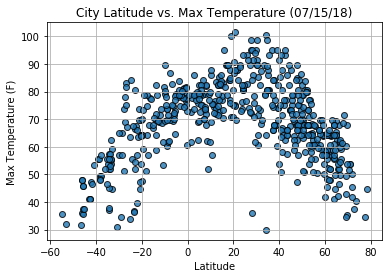

In [6]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

### Laitude vs. Humidity Plot

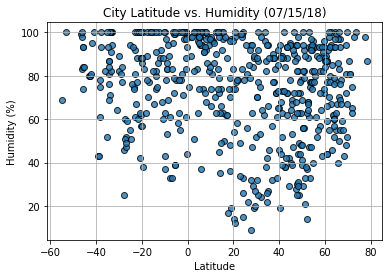

In [7]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness Plot

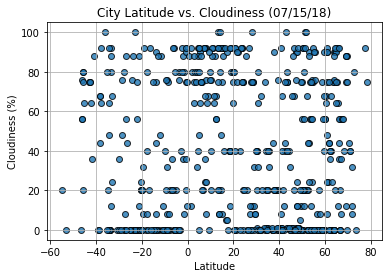

In [8]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

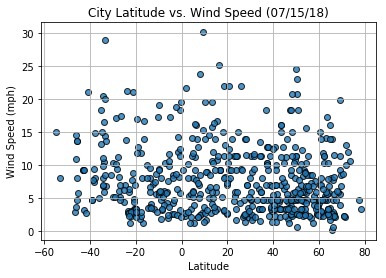

In [9]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()